In [ ]:
import sys
!{sys.executable} -m pip install numpy pandas matplotlib sklearn seaborn

### 1 - Step

**1.** Looking for missing values.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#%matplotlib inline
%matplotlib notebook 

df = pd.read_csv('./winequality-red.csv')

df_missig_values = df[df.isna() == True].value_counts()

print("Checking if contains missing values: {}".format(len(df_missig_values)))
print("Size: {} rows and {} features".format(df.shape[0], df.shape[1]))

Checking if contains missing values: 0
Size: 1599 rows and 12 features


In [4]:
df.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### Dataframe info

- Dataframe have 1599 records
- Data columns: total 12 columns
- There is no missing values
- There is no categorical feature

### 2 - Step

**2.** Correlation between the features

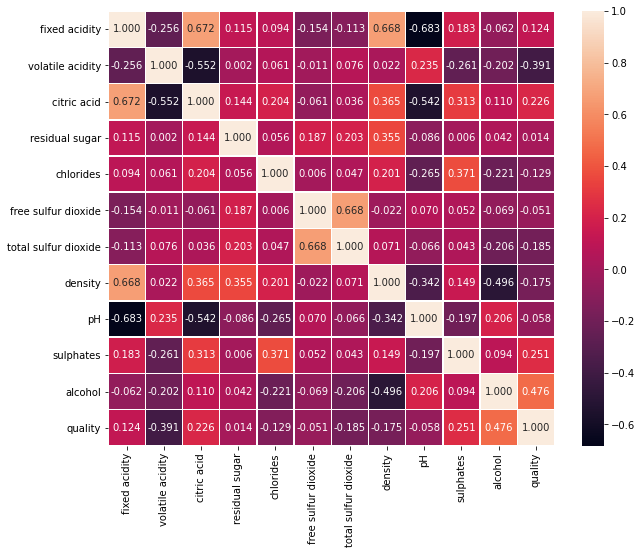

In [5]:
import seaborn as sns
%matplotlib inline

plt.subplots(figsize=(10, 8))

sns.heatmap(df.corr(), annot=True, fmt=".3f", linewidths=.5);

In [6]:
# Normalize the dataframe to return proportions rather than frequencies
def normalize_data(dataframe, column, ascending):
    '''
    Parameters
    ----------
        dataframe: DataFrame
            Data structure with labeled axes
        column: str
            Column label to use for normalization
        ascending: bool
            Sort ascending (True) or descending (False)
            
    Returns
    -------
        dataframe: DataFrame
            Dataframe normalized with proportions according to the column
    '''
    return dataframe[column].value_counts(normalize=True).sort_values(ascending=ascending).to_frame()

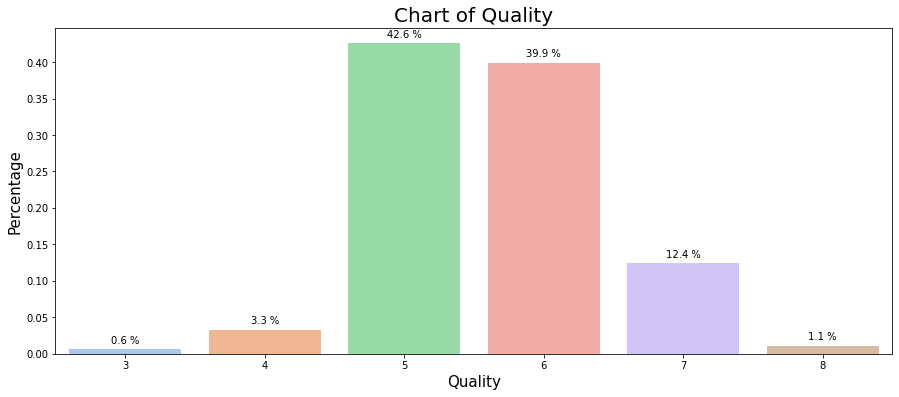

In [8]:
plt.figure(figsize=(15,6))
    
quality_count = normalize_data(df, 'quality', False)
quality_count = quality_count.rename(columns={'quality':'Percentage'})

ax = sns.barplot(x=quality_count.index, y='Percentage', data=quality_count, palette="pastel")

# Annotate the point xy with number formatted like percentage
# For more details look on https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.axes.Axes.annotate.html#matplotlib.axes.Axes.annotate 
for p in ax.patches:
    ax.annotate('{:.1f} %'.format((p.get_height() * 100)),
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='center',
               xytext = (0,9),
               textcoords='offset points')
    
plt.xlabel("Quality", fontsize=15)
plt.ylabel("Percentage", fontsize=15)
plt.title("Chart of Quality", fontsize=20)
plt.show()


### 3 - Step

**3.** Transform into percentage values

In [10]:
def convert_value_into_percentage(fraction_number):
    '''
    Parameters
    ----------
        fraction_number: float
            Number in decimal form
    
    Returns
    -------
        float
            the percentage calculated
    '''
    return fraction_number * 100

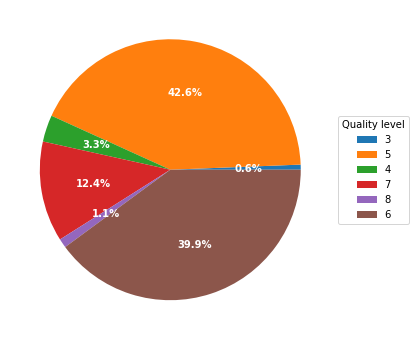

In [11]:
quality_count = normalize_data(df, 'quality', True)

# I sorted to look better on the pie chart
quality_count = quality_count.rename(columns={'quality':'Percentage'}).sort_values(by='Percentage').reindex([3, 5, 4, 7, 8, 6])

# Apply the function to transform
quality_count['Percentage'] = quality_count['Percentage'].apply(convert_value_into_percentage)


# Building a plot
fig1, ax1 = plt.subplots(figsize=(6, 6))

wedges, texts, autotexts = ax1.pie(quality_count['Percentage'], autopct='%1.1f%%', startangle=0, textprops=dict(color="w"))

ax1.legend(wedges, quality_count.index,
          title="Quality level",
          loc="center left",
          bbox_to_anchor=(1, 0, 0, 1))

plt.setp(autotexts, size=10, weight="bold")

plt.show()

### 4 - Step

**4.** Looking on alcohol features distribution using box plot

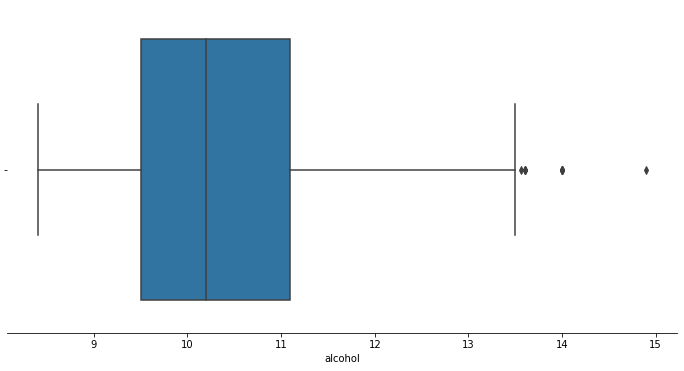

In [12]:
f, ax = plt.subplots(1, 1, figsize=(12, 6))
sns.despine(left=True)

sns.boxplot(x=df['alcohol'])
#sns.boxplot(x=df['citric acid'], ax=ax[1])
#sns.boxplot(x=df['sulphates'], ax=ax[2])

plt.show()

### 5 - Step

**5.** Looking the alcohol features distribution bases on quality

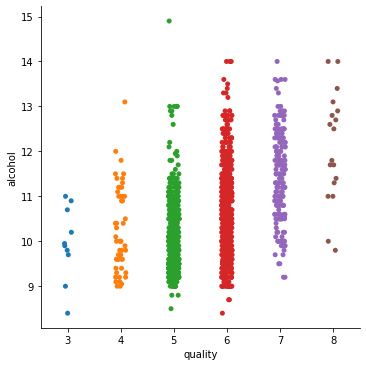

In [13]:
sns.catplot(x="quality", y="alcohol", data=df)
plt.show()